# Tutorial: Mouse cortex single-cell callingcards data. 

 The data is from [Moudgil et al., Cell. (2020)](https://doi.org/10.1016/j.cell.2020.06.037).

In [1]:
import pycallingcards as cc
import numpy as np
import pandas as pd
import scanpy as sc



Read single-cell calling cards ccf data. The columns indecates the chromosome, the start, end point of each htop, read number, direction and cell borcode.

In [2]:
ccf_data = cc.datasets.mousecortex_ccf()
ccf_data 

,0,1,2,3,4,5
0,chr1,3112541,3112545,12,+,GATGAAAAGAGTTGGC-1
1,chr1,3121337,3121341,6,-,CGATCGGCACATTTCT-1
2,chr1,3199281,3199285,7,+,GTCCTCATCTCCGGTT-1
3,chr1,3211433,3211437,22,-,CGAGAAGAGGAATCGC-1
4,chr1,3245859,3245863,149,+,TTTACTGCATCCGCGA-1
...,...,...,...,...,...,...
111377,chrY,90807968,90807972,200,-,ACGGAGAGTCGCATAT-1
111378,chrY,90833531,90833535,51,-,TAGCCGGTCCTGTACC-1
111379,chrY,90833600,90833604,13,-,TTGGCAAAGAATTGTG-1
111380,chrY,90840262,90840266,8,-,GTGCATAGTACCAGTT-1


Because the htops are discrete, we now call the peaks to diagnose potential binding sites.

In [3]:
peak_data = cc.pp.callpeaks(ccf_data, method = "test", reference = "mm10",  maxbetween = 2000,pvalue_cutoff = 0.01,
                  lam_win_size = 1000000,  pseudocounts = 1, record = True)
peak_data

For the test method without background, [expdata, reference, pvalue_cutoff, lam_win_size, pseudocounts, minlen, extend, maxbetween, test_method, min_hops, record] would be utilized.


100%|██████████| 21/21 [00:21<00:00,  1.01s/it]


,Chr,Start,End,Experiment Hops,Reference Hops,Expected Hops,pvalue
0,chr1,3399868,3400272,5,4,1.031353,6.965061e-04
1,chr1,4806673,4809049,12,20,1.120541,2.498336e-10
2,chr1,9300144,9300901,5,5,1.037149,7.168254e-04
3,chr1,14302176,14310895,14,92,1.523252,1.015569e-10
4,chr1,15287495,15288141,8,4,1.029800,1.427167e-06
...,...,...,...,...,...,...,...
2166,chrX,166172262,166174518,6,10,1.137755,1.824630e-04
2167,chrX,166241178,166243587,8,18,1.257844,7.050309e-06
2168,chrX,166345453,166350005,11,35,1.507674,7.204418e-08
2169,chrX,168117814,168120255,7,21,1.162110,2.957329e-05



In order to choose good paramenters/method for peak calling. Taking a look at the genome is strongly adviced.

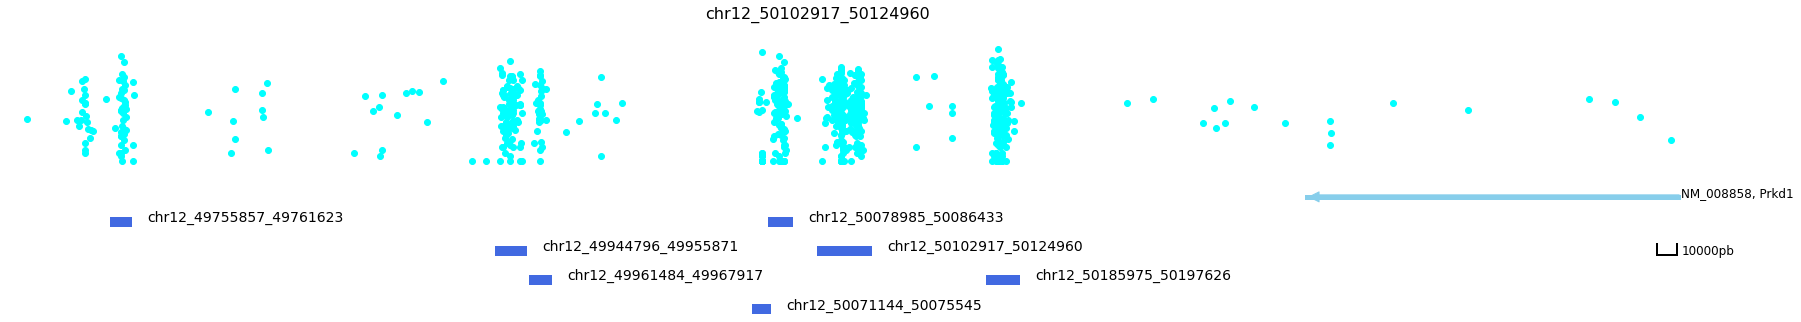

In [4]:
cc.pl.draw_area("chr12",50102917,50124960,400000,peak_data,ccf_data,"mm10",
                figsize = (30,5),peak_line = 4,save = True, title = "chr12_50102917_50124960")

Find out the closest genes for each peak to annotate.

In [5]:
peak_annotation = cc.pp.annotation(peak_data, reference = "mm10", method = "bedtools")
peak_annotation = cc.pp.combine_annotation(peak_data,peak_annotation)
peak_annotation

In the bedtools method, we would use bedtools in the default path. Set bedtools path by 'bedtools_path' if needed.


,Chr,Start,End,Experiment Hops,Reference Hops,Expected Hops,pvalue,Nearest Refseq1,Gene Name1,Nearest Refseq2,Gene Name2
0,chr1,3399868,3400272,5,4,1.031353,6.965061e-04,NM_001011874,Xkr4,NM_001195662,Rp1
1,chr1,4806673,4809049,12,20,1.120541,2.498336e-10,NM_008866,Lypla1,NR_033530,Mrpl15
2,chr1,9300144,9300901,5,5,1.037149,7.168254e-04,NM_001290390,Sntg1,NM_021511,Rrs1
3,chr1,14302176,14310895,14,92,1.523252,1.015569e-10,NM_010164,Eya1,NM_010827,Msc
4,chr1,15287495,15288141,8,4,1.029800,1.427167e-06,NM_001098528,Kcnb2,NM_177781,Trpa1
...,...,...,...,...,...,...,...,...,...,...,...
2166,chrX,166172262,166174518,6,10,1.137755,1.824630e-04,NM_001310724,Gemin8,NM_023122,Gpm6b
2167,chrX,166241178,166243587,8,18,1.257844,7.050309e-06,NM_023122,Gpm6b,NM_001310724,Gemin8
2168,chrX,166345453,166350005,11,35,1.507674,7.204418e-08,NM_023122,Gpm6b,NM_177429,Ofd1
2169,chrX,168117814,168120255,7,21,1.162110,2.957329e-05,NM_001290427,Frmpd4,NM_001290428,Frmpd4


Read the barocede file.

In [6]:
barcodes = cc.datasets.mousecortex_barcodes()
barcodes

,index
0,AAACCTGAGAACTCGG-1
1,AAACCTGAGCAATCTC-1
2,AAACCTGAGCCGTCGT-1
3,AAACCTGAGTAGCGGT-1
4,AAACCTGAGTGGAGTC-1
...,...
35945,TTTGTCAAGTCCCACG-1
35946,TTTGTCACAGCGTCCA-1
35947,TTTGTCACATTTCACT-1
35948,TTTGTCAGTCGCATCG-1


Use ccf data, peak data and barcodes data to make a cell by peak anndata object.

In [7]:
adata_ccf = cc.pp.makeAnndata(ccf_data, peak_annotation, barcodes)
adata_ccf

AnnData object with n_obs × n_vars = 35950 × 2171
    var: 'Chr', 'Start', 'End', 'Experiment Hops', 'Reference Hops', 'Expected Hops', 'pvalue', 'Nearest Refseq1', 'Gene Name1', 'Nearest Refseq2', 'Gene Name2'

Read the RNA data. [Scanpy](https://scanpy.readthedocs.io/en/stable/) is recommended to read and analyze single-cell RNA-seq data.

In [8]:
adata = cc.datasets.mousecortex_RNA()
adata

AnnData object with n_obs × n_vars = 30300 × 2638
    obs: 'batch', 'n_genes', 'total_counts', 'cluster'
    var: 'n_counts', 'n_cells', 'highly_variable'

In the RNA-seq analysis, many cells are filtered because of low quility. We need to make the cells in ccf anndata to be the exactly same as RNA-seq anndata.

In [9]:
adata_ccf = adata_ccf[adata.obs.index]
adata_ccf,adata_ccf.X,adata_ccf.obs.index==adata_ccf.obs.index

(View of AnnData object with n_obs × n_vars = 30300 × 2171
     var: 'Chr', 'Start', 'End', 'Experiment Hops', 'Reference Hops', 'Expected Hops', 'pvalue', 'Nearest Refseq1', 'Gene Name1', 'Nearest Refseq2', 'Gene Name2',
 <30300x2171 sparse matrix of type '<class 'numpy.float32'>'
 	with 19818 stored elements in Compressed Sparse Column format>,
 array([ True,  True,  True, ...,  True,  True,  True]))

Many analysis results for RNA could be used in calling cards analysis. Here, we would like use the clustering results and compare the difference of calling cards binding among different clusters. 

In [10]:
adata_ccf.obs[['cluster']] = adata.obs[['cluster']]
adata_ccf.obs

/tmp/ipykernel_2879729/2786046817.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ccf.obs[['cluster']] = adata.obs[['cluster']]


,cluster
index,
AAACCTGAGAACTCGG-1,Neuron_Excit_L5_Mixed
AAACCTGAGCCGTCGT-1,Astrocyte
AAACCTGAGTAGCGGT-1,Astrocyte
AAACCTGAGTGGAGTC-1,Neuron_Inhibitory
AAACCTGCAGCATGAG-1,Astrocyte
...,...
TTTGTCAAGTCCCACG-1,Neuron_Granule_DG
TTTGTCACAGCGTCCA-1,Neuron_Cajal-Retzius
TTTGTCACATTTCACT-1,Neuron_Granule_DG


Although one peak should have many htops, but there is a chance that all the cells from the peak was filtered by the RNA preprocesssing. In this case, we advice to filter the peaks. 

In [11]:
cc.pp.filter_peaks(adata_ccf, min_counts=1)

Differential binding analysis would find out the significant binding for each cluster.

In [ ]:
cc.tl.rank_peak_groups(adata_ccf,"cluster",method = 'binomtest',key_added = 'binomtest')

Plot the results for differential binding analysis.

In [ ]:
cc.pl.rank_peak_groups(adata_ccf, key = 'binomtest', save = True)

Take a look at the genome for highly differentiated peaks is strongly adviced.

In [ ]:
cc.pl.draw_area("chr12",50102917,50124960,400000,peak_data,ccf_data,"mm10",adata_ccf,
                "Neuron_Excit_L5_Mixed",'cluster',figsize = (30,6),peak_line = 4,color = "red")

In [ ]:
cc.pl.draw_area("chr12",50102917,50124960,400000,peak_data,ccf_data,"mm10",adata_ccf,
                "Astrocyte",'cluster',figsize = (30,6),peak_line = 4,color = "red")

Saved the file if needed.

In [ ]:
adata_ccf.write("Mouse-Cortex_CCF.h5ad")